In [63]:
import sys

sys.path.append("../libs")


CONFIG = {
    "model_path": "../data/model/model_baseline.joblib",
    "features_path": "../data/model/baseline_features_list.json",
    "feature_dataset_database_file": "../data/feature_store.db",
}

## Load Model

In [64]:
import joblib

model = joblib.load(CONFIG["model_path"])

In [97]:
import json

with open(CONFIG["features_path"], 'r') as f:
    features = json.load(f)
features

['funded_amnt',
 'term',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl'

In [66]:
from feature_dataset import FeatureDataset
import pandas as pd
fs = FeatureDataset(CONFIG['feature_dataset_database_file'])

df_calibration: pd.DataFrame = fs.get_feature_dataset(name="calibration", version=1)

In [67]:
df_calibration['time_of_banking_days'] = (df_calibration['issue_d'] - df_calibration['earliest_cr_line']).dt.days
df_calibration['time_of_banking_months'] = (df_calibration['issue_d'].dt.year - df_calibration['earliest_cr_line'].dt.year) * 12 + (df_calibration['issue_d'].dt.month - df_calibration['earliest_cr_line'].dt.month)

In [68]:
cat_features = [
    "emp_length",
    "home_ownership",
    "verification_status",
    "purpose",
    "addr_state",
    "application_type",
]
df_calibration[cat_features] = df_calibration[cat_features].astype(str).fillna('missing')


In [69]:
import numpy as np
df_training, df_testing = np.split(df_calibration.sort_values(by='issue_d'), [int(.80 *len(df_calibration))])

/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
df_training

,id,loan_amnt,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,default,time_of_banking_days,time_of_banking_months,target
0,65682103,24000,24000,36,732.500,< 1 year,RENT,95000.0,Source Verified,2015-11-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,6179,203,0.0
1073,65924925,26300,26300,60,661.500,10+ years,MORTGAGE,71500.0,Source Verified,2015-11-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,4322,142,0.0
1072,66074800,16000,16000,60,327.250,10+ years,RENT,120000.0,Source Verified,2015-11-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,9284,305,0.0
1071,65815490,22000,22000,36,688.500,2 years,MORTGAGE,140000.0,Not Verified,2015-11-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,5052,166,0.0
1070,65787086,5000,5000,36,155.000,5 years,MORTGAGE,109000.0,Source Verified,2015-11-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,5478,180,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366769,91612355,9000,9000,36,296.750,5 years,MORTGAGE,45000.0,Source Verified,2016-10-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,1704,56,0.0
366768,91302718,25000,25000,36,840.000,< 1 year,MORTGAGE,100000.0,Source Verified,2016-10-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,5418,178,0.0
366767,91040250,3000,3000,36,111.500,3 years,RENT,78000.0,Verified,2016-10-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,3714,122,0.0
366766,91022599,8000,8000,36,260.000,4 years,RENT,48000.0,Not Verified,2016-10-01,...,-1.0,-1,-1,-1.0,-1.0,-1.0,0.0,8827,290,0.0


In [98]:
features = features + ["target"]

In [73]:
feature = list(set(features))

In [74]:
df_training = df_training[features]
df_testing = df_testing[features]

In [75]:
X_train = df_training.drop(columns=["target"])
y_train = df_training["target"]

X_test = df_testing.drop(columns=["target"])
y_test = df_testing["target"]

In [76]:
df_training["target"]

0         0.0
1073      0.0
1072      0.0
1071      0.0
1070      0.0
         ... 
366769    0.0
366768    0.0
366767    0.0
366766    0.0
366765    0.0
Name: target, Length: 354736, dtype: float32

In [77]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score, brier_score_loss
import joblib
import json

# Platt scaling (sigmoid)
print('Fitting platt scaling calibration...')
calibrated_model_sigmoid = CalibratedClassifierCV(model, method='sigmoid')
calibrated_model_sigmoid.fit(X_train, y_train)


Fitting platt scaling calibration...
0:	learn: 0.7816339	total: 158ms	remaining: 2m 38s
1:	learn: 0.7963654	total: 245ms	remaining: 2m 2s
2:	learn: 0.7966709	total: 348ms	remaining: 1m 55s
3:	learn: 0.7989686	total: 425ms	remaining: 1m 45s
4:	learn: 0.8013340	total: 520ms	remaining: 1m 43s
5:	learn: 0.8034483	total: 609ms	remaining: 1m 40s
6:	learn: 0.8037067	total: 703ms	remaining: 1m 39s
7:	learn: 0.8038481	total: 805ms	remaining: 1m 39s
8:	learn: 0.8042053	total: 887ms	remaining: 1m 37s
9:	learn: 0.8046639	total: 982ms	remaining: 1m 37s
10:	learn: 0.8047189	total: 1.07s	remaining: 1m 36s
11:	learn: 0.8042397	total: 1.18s	remaining: 1m 36s
12:	learn: 0.8044250	total: 1.27s	remaining: 1m 36s
13:	learn: 0.8044607	total: 1.36s	remaining: 1m 35s
14:	learn: 0.8041600	total: 1.47s	remaining: 1m 36s
15:	learn: 0.8043142	total: 1.56s	remaining: 1m 35s
16:	learn: 0.8040076	total: 1.64s	remaining: 1m 35s
17:	learn: 0.8038909	total: 1.74s	remaining: 1m 34s
18:	learn: 0.8043855	total: 1.84s	rema

CalibratedClassifierCV(estimator=<catboost.core.CatBoostClassifier object at 0x30efc3410>)

In [78]:
y_pred_sigmoid = calibrated_model_sigmoid.predict_proba(X_test)[:, 1]

/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


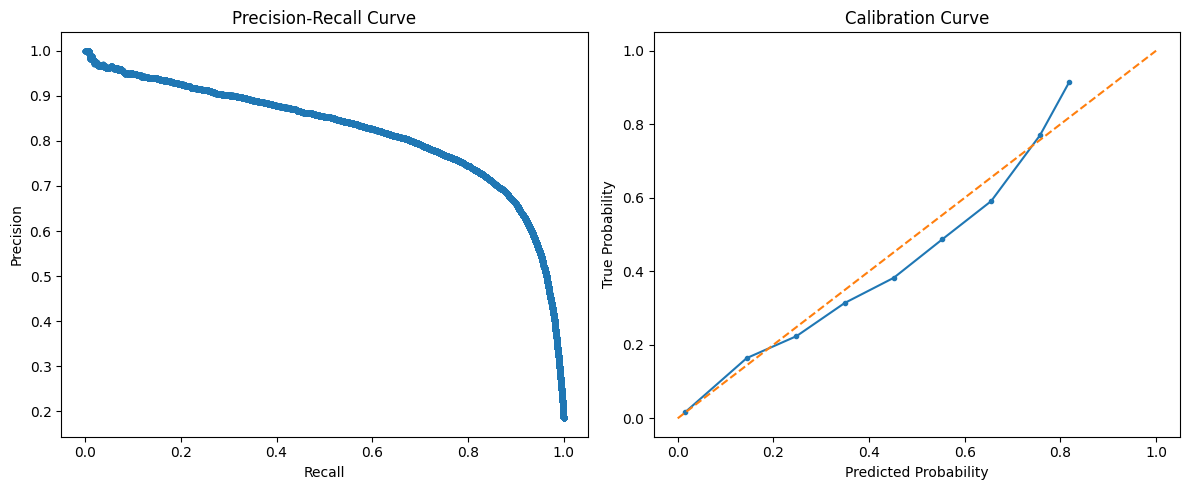

In [80]:
from evaluation.evaluation import plot_pr_calib_curve

plot_pr_calib_curve(y_pred_sigmoid, y_test)


In [103]:
df_testing: pd.DataFrame = fs.get_feature_dataset(name="testing", version=1)
df_testing['time_of_banking_days'] = (df_testing['issue_d'] - df_testing['earliest_cr_line']).dt.days
df_testing['time_of_banking_months'] = (df_testing['issue_d'].dt.year - df_testing['earliest_cr_line'].dt.year) * 12 + (df_testing['issue_d'].dt.month - df_testing['earliest_cr_line'].dt.month)
df_testing = df_testing[features]

In [104]:
df_testing.head()

,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,time_of_banking_days,time_of_banking_months,target
0,1200,36,40.71875,5 years,RENT,45000.0,Source Verified,major_purchase,NY,13.890625,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,7031,231,0.0
1,6000,36,185.25000,nan,RENT,30000.0,Source Verified,debt_consolidation,CA,12.796875,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,7215,237,0.0
2,4800,36,173.50000,< 1 year,OWN,42000.0,Verified,debt_consolidation,IN,19.562500,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,1187,39,0.0
3,8925,36,290.00000,10+ years,MORTGAGE,60000.0,Not Verified,credit_card,WA,26.953125,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,6301,207,0.0
4,3600,36,145.50000,4 years,RENT,20000.0,Source Verified,small_business,VA,13.570312,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,1187,39,1.0


In [110]:
df_testing['target_predicted'] = calibrated_model_sigmoid.predict_proba(df_testing)[:, 1]

In [111]:
df_testing.head()

,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,time_of_banking_days,time_of_banking_months,target,target_predicted
0,1200,36,40.71875,5 years,RENT,45000.0,Source Verified,major_purchase,NY,13.890625,...,-1.0,-1,-1,-1.0,-1.0,-1.0,7031,231,0.0,0.464543
1,6000,36,185.25000,nan,RENT,30000.0,Source Verified,debt_consolidation,CA,12.796875,...,-1.0,-1,-1,-1.0,-1.0,-1.0,7215,237,0.0,0.016794
2,4800,36,173.50000,< 1 year,OWN,42000.0,Verified,debt_consolidation,IN,19.562500,...,-1.0,-1,-1,-1.0,-1.0,-1.0,1187,39,0.0,0.010439
3,8925,36,290.00000,10+ years,MORTGAGE,60000.0,Not Verified,credit_card,WA,26.953125,...,-1.0,-1,-1,-1.0,-1.0,-1.0,6301,207,0.0,0.009661
4,3600,36,145.50000,4 years,RENT,20000.0,Source Verified,small_business,VA,13.570312,...,-1.0,-1,-1,-1.0,-1.0,-1.0,1187,39,1.0,0.163028


In [112]:
from evaluation.evaluation import clf_metric_report

clf_metric_report(df_testing['target_predicted'], df_testing['target'])


Evaluating the model...
ROC AUC: 0.9621996348493634
Brier Score: 0.058074018591014534
Average Precision: 0.875926424734327
Log Loss: 0.20251610608000098


In [113]:

model_path = '../data/model/model_calibrated.joblib'
joblib.dump(calibrated_model_sigmoid, model_path)

print(f"Baseline model saved to: {model_path}")


Baseline model saved to: ../data/model/model_calibrated.joblib
